Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=1, out_features=20, bias=True)
  (2): Tanh()
  (3): Linear(in_features=20, out_features=20, bias=True)
  (4): Tanh()
  (5): Linear(in_features=20, out_features=20, bias=True)
  (6): Tanh()
  (7): Linear(in_features=20, out_features=1, bias=True)
)
epoch 1, training loss 22.120605, test loss 19.958403
epoch 501, training loss 3.934444, test loss 4.383393
epoch 1001, training loss 0.184081, test loss 0.302884
epoch 1501, training loss 0.169501, test loss 0.290340
epoch 2001, training loss 0.168348, test loss 0.288689
epoch 2501, training loss 0.167979, test loss 0.287178
epoch 3001, training loss 0.167732, test loss 0.286052
epoch 3501, training loss 0.167465, test loss 0.285326
epoch 4001, training loss 0.166781, test loss 0.283927
epoch 4501, training loss 0.073495, test loss 0.131503
epoch 5001, training loss 0.003408, test loss 0.021280
epoch 5501, training loss 0.001423, test loss 0.016267
epoch 6001, trai

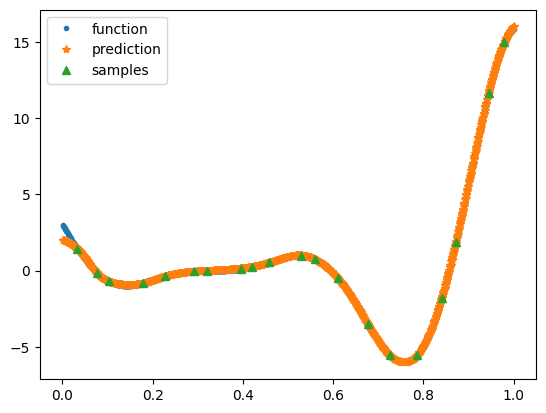

In [1]:
import sys
import torch
import gpytorch
import numpy as np
import matplotlib.pyplot as plt

# import local functions
from mfpml.design_of_experiment.sf_samplers import LatinHyperCube
from mfpml.problems.sf_functions import Forrester
from mfpml.models.mlp import MLPModel

# user-defined parameters
num_sample = 20
# training_iter = 200
num_test = 1000
# learning_rate = 0.1
# define the design space
function = Forrester()
design_space = function.design_space

# sampling
sampler = LatinHyperCube(design_space=design_space, seed=None)
sample_x = sampler.get_samples(num_samples=num_sample)
sample_y = function.f(sample_x)
train_x = torch.from_numpy(sample_x).to(torch.float32)
train_y = torch.from_numpy(sample_y).to(torch.float32)

# get the test data
test_x_temp = sampler.get_samples(num_samples=num_test)
test_y_temp = function.f(test_x_temp)
test_x = torch.from_numpy(test_x_temp).to(torch.float32)
test_y = torch.from_numpy(test_y_temp).to(torch.float32)

# nn model
mlp_model = MLPModel(
    num_inputs=1, hiden_layers=[20, 20, 20], num_outputs=1, activation="tanh"
)
# define the loss function
mlp_model.define_loss(loss_metric="mse")
mlp_model.define_optimizer(
    optimizer="adam", learning_rate=0.001, weight_decay=0.00001
)

print(mlp_model.net)

mlp_model.train(
    train_x=train_x,
    train_y=train_y,
    test_x=test_x,
    test_y=test_y,
    design_space=design_space,
    normlize=False,
    train_epoch=10000,
    batch_size=num_sample,
    print_info=True,
)
pred_y = mlp_model.predict(test_x=mlp_model.test_x)

fig, ax = plt.subplots()
ax.plot(test_x.detach(), test_y.detach(), ".", label="function")
ax.plot(test_x.detach(), pred_y.detach(), "*", label="prediction")
ax.plot(train_x.detach(), train_y.detach(), "^", label="samples")
ax.legend()
plt.show()


In [14]:
aa = mlp_model.net.state_dict()
aa['3.weight'].size()

torch.Size([20, 20])